In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split , KFold, cross_val_score
from sklearn.linear_model import LogisticRegression 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

In [24]:
def load_and_prepare_data(file_path):
    df = pd.read_csv(file_path)

    missing_values = df.isnull().sum()
    if missing_values.any():
        df_cleaned = df.dropna()
        print("Linhas com valores ausentes foram removidas.")
    else:
        df_cleaned = df

    return df_cleaned

In [25]:
def detect_label_column(df):
    label_column = df.columns[-1]
    return label_column

In [26]:
def plot_mean_accuracy_graph(mean_accuracy):
    num_datasets = len(mean_accuracies)
    x_positions = np.arange(num_datasets)

    plt.bar(x_positions, mean_accuracies, color='blue')
    plt.xticks(x_positions, file_paths, rotation=45)
    plt.xlabel('Conjunto de Dados')
    plt.ylabel('Acurácia Média')
    plt.title('Acurácia Média do Classificador por Conjunto de Dados')
    plt.show()

In [27]:
def run_logistic_regression_evaluation(file_path):
    df = load_and_prepare_data(file_path)

    label_column = detect_label_column(df)

    X = df.drop(columns=[label_column])
    y = df[label_column]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    accuracies = []

    logisticRegression = LogisticRegression(max_iter=200)

    for train_index, test_index in kf.split(X_scaled):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        logisticRegression.fit(X_train, y_train)
        accuracy = logisticRegression.score(X_test, y_test)
        accuracies.append(accuracy)

    print(f"Acurácias de cada fold: {accuracies}")
    mean_accuracy = np.mean(accuracies)

    return mean_accuracy

In [28]:
def main(mean_accuracy, file_paths):
    for file_path in file_paths:
        mean_accuracy = run_logistic_regression_evaluation(file_path)
        mean_accuracies.append(mean_accuracy)

    for i, mean_accuracy in enumerate(mean_accuracies):
        print(f"Acurácia média para {file_paths[i]}: {mean_accuracy:.2f}")

    plot_mean_accuracy_graph(mean_accuracies)

Acurácias de cada fold: [0.575, 0.578125, 0.56875, 0.5625, 0.670846394984326]
Acurácias de cada fold: [0.7532467532467533, 0.7857142857142857, 0.7532467532467533, 0.803921568627451, 0.7450980392156863]
Acurácia média para winequality-red.csv: 0.59
Acurácia média para diabetes.csv: 0.77


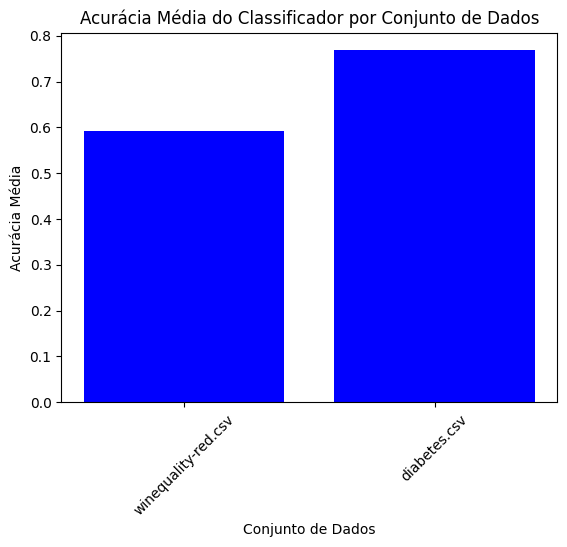

In [29]:
file_paths = ['winequality-red.csv', 'diabetes.csv']
mean_accuracies = []

main(mean_accuracies, file_paths)